# IMPORT

#### LIBRARIES

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

#### DATASET

In [5]:
# Reading of Dataset and storing it into a DataFrame
data = pd.read_csv("application_train.csv")
data_t = pd.read_csv("application_test.csv")

# EXPLORATORY  DATA  ANALYSIS (EDA)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


##### DROPPING ID COLUMN

In [8]:
ID = data_t['SK_ID_CURR']

In [9]:
data.drop(['SK_ID_CURR'],axis= 1,inplace=True)
data_t.drop(['SK_ID_CURR'],axis= 1,inplace=True)

.

.

### SLIDES - VISUALISATION ----------------------------------------------------------------------------------------------------------------------------

.

# VISUALISATION

In [7]:
data_1 = data[['DAYS_BIRTH','TARGET','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','NAME_CONTRACT_TYPE','AMT_GOODS_PRICE',
               'CODE_GENDER','NAME_EDUCATION_TYPE','OCCUPATION_TYPE','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',
               'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']]

#### AGE Distribution

In [8]:
ser = []
for i in range(data_1.shape[0]):
    if 0 < (-data_1['DAYS_BIRTH'][i]/365) <= 10:
        ser.append('0 to 10 years')
    if 10 < (-data_1['DAYS_BIRTH'][i]/365) <= 20:
        ser.append('10 to 20 years')
    if 20 < (-data_1['DAYS_BIRTH'][i]/365) <= 30:
        ser.append('20 to 30 years')
    if 30 < (-data_1['DAYS_BIRTH'][i]/365) <= 40:
        ser.append('30 to 40 years')
    if 40 < (-data_1['DAYS_BIRTH'][i]/365) <= 50:
        ser.append('40 to 50 years')    
    if 50 < (-data_1['DAYS_BIRTH'][i]/365) <= 60:
        ser.append('50 to 60 years')
    if 60 < (-data_1['DAYS_BIRTH'][i]/365) <= 70:
        ser.append('60 to 70 years')
    if 70 < (-data_1['DAYS_BIRTH'][i]/365) <= 80:
        ser.append('70 to 80 years')
    if 80 < (-data_1['DAYS_BIRTH'][i]/365) <= 90:
        ser.append('80 to 90 years')
    if 90 < (-data_1['DAYS_BIRTH'][i]/365) <= 100:
        ser.append('90 to 100 years')    
data_1['DAYS_BIRTH'] = ser 

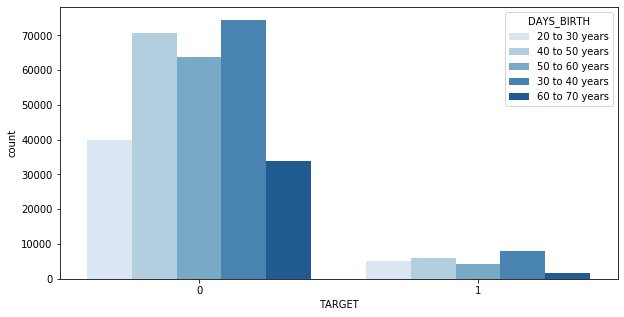

In [9]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'TARGET',hue = 'DAYS_BIRTH',data = data_1,palette = 'Blues')
plt.show()

In [10]:
d = data_1.copy()
#outlier removal
u = data_1['AMT_INCOME_TOTAL'].quantile(0.25) - 1.5*(data_1['AMT_INCOME_TOTAL'].quantile(0.25)-data_1['AMT_INCOME_TOTAL'].quantile(0.75))
l = data_1['AMT_INCOME_TOTAL'].quantile(0.75) + 1.5*(data_1['AMT_INCOME_TOTAL'].quantile(0.25)-data_1['AMT_INCOME_TOTAL'].quantile(0.75))

d = d[(l<d['AMT_INCOME_TOTAL'])&(d['AMT_INCOME_TOTAL']<u)]
d = d.reset_index()

In [11]:
ser_1 = []
for i in range(d.shape[0]):
    if 0 <(d['AMT_INCOME_TOTAL'][i])<= 25000:
        ser_1.append('0 to INR 25000 ')
    if 25000 < d['AMT_INCOME_TOTAL'][i] <= 50000:
        ser_1.append('25000 to INR 50000 ')
    if 50000 < d['AMT_INCOME_TOTAL'][i] <= 75000:
        ser_1.append('50000 to INR 75000 ')
    if 75000 < d['AMT_INCOME_TOTAL'][i] <= 100000:
        ser_1.append('75000 to INR 100000 ')
    if 100000 < d['AMT_INCOME_TOTAL'][i] <= 125000:
        ser_1.append('100000 to INR 125000 ')
    if 125000 < d['AMT_INCOME_TOTAL'][i] <= 150000:
        ser_1.append('125000 to INR 150000 ')
    if 150000 < d['AMT_INCOME_TOTAL'][i] <= 175000:
        ser_1.append('150000 to INR 175000 ')
    if 175000 < d['AMT_INCOME_TOTAL'][i] <= 200000:
        ser_1.append('175000 to INR 200000 ')
    if 200000 < d['AMT_INCOME_TOTAL'][i] <= 225000:
        ser_1.append('200000 to INR 225000 ')
    if 225000 < d['AMT_INCOME_TOTAL'][i] <= 250000:
        ser_1.append('225000 to INR 250000 ')
    
d['AMT_INCOME_TOTAL'] = ser_1 

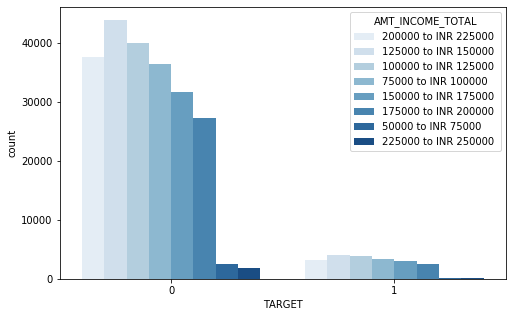

In [12]:
plt.figure(figsize = (8,5))
sns.countplot(x = d['TARGET'],hue =d['AMT_INCOME_TOTAL'],palette = 'Blues')
plt.show()

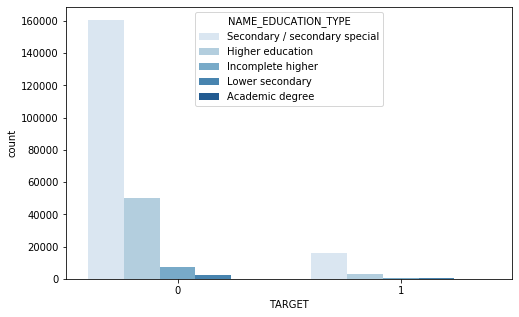

In [13]:
plt.figure(figsize = (8,5))
sns.countplot(x = d['TARGET'],hue =d['NAME_EDUCATION_TYPE'],palette = 'Blues')
plt.show()

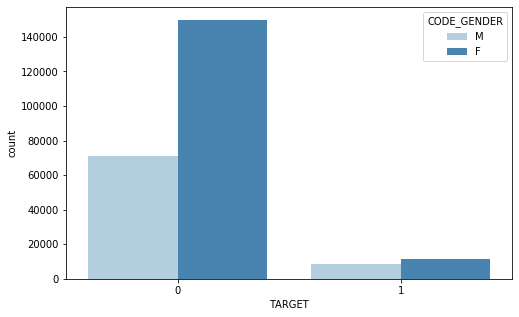

In [14]:
cg = d[d['CODE_GENDER'] != 'XNA']
plt.figure(figsize = (8,5))
sns.countplot(x = cg['TARGET'],hue =cg['CODE_GENDER'],palette = 'Blues')
plt.show()

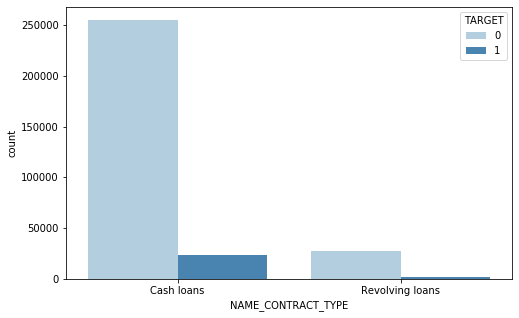

In [15]:
plt.figure(figsize = (8,5))
sns.countplot(x =data_1['NAME_CONTRACT_TYPE'],hue = data_1['TARGET'],palette = 'Blues')
plt.show()

In [16]:
d1 = d[d['TARGET'] == 1]
d0 = d[d['TARGET'] == 0]

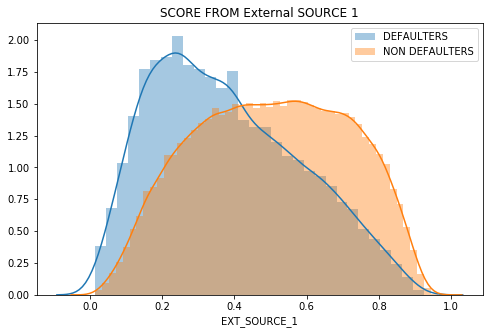

In [17]:
fig,axes = plt.subplots(1,1,figsize = (8,5))
plt.subplot(1,1,1)
plt.title("SCORE FROM External SOURCE 1")
sns.distplot(d1['EXT_SOURCE_1'].dropna(),label = 'DEFAULTERS')
plt.subplot(1,1,1)
sns.distplot(d0['EXT_SOURCE_1'].dropna(),label = 'NON DEFAULTERS')
plt.legend()
plt.show()

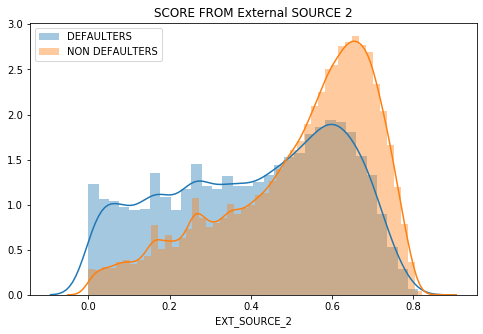

In [18]:
fig,axes = plt.subplots(1,1,figsize = (8,5))
plt.subplot(1,1,1)
plt.title("SCORE FROM External SOURCE 2")
sns.distplot(d1['EXT_SOURCE_2'].dropna(),label = 'DEFAULTERS')
plt.subplot(1,1,1)
sns.distplot(d0['EXT_SOURCE_2'].dropna(),label = 'NON DEFAULTERS')
plt.legend()
plt.show()

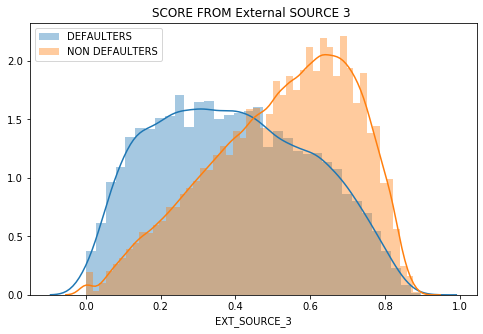

In [19]:
fig,axes = plt.subplots(1,1,figsize = (8,5))
plt.subplot(1,1,1)
plt.title("SCORE FROM External SOURCE 3 ")
sns.distplot(d1['EXT_SOURCE_3'].dropna(),label = 'DEFAULTERS')
plt.subplot(1,1,1)
sns.distplot(d0['EXT_SOURCE_3'].dropna(),label = 'NON DEFAULTERS')
plt.legend()
plt.show()

#### Pie Chart 

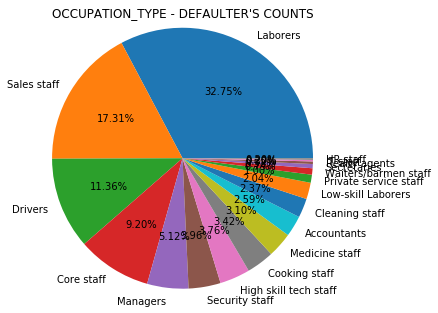

In [20]:
plt.figure(figsize = (10,5))
plt.title("OCCUPATION_TYPE - DEFAULTER'S COUNTS")
plt.pie(list(d1['OCCUPATION_TYPE'].value_counts()),labels = list(d1['OCCUPATION_TYPE'].value_counts().index),
        autopct = "%0.2f%%",radius = 1.2)
plt.show()

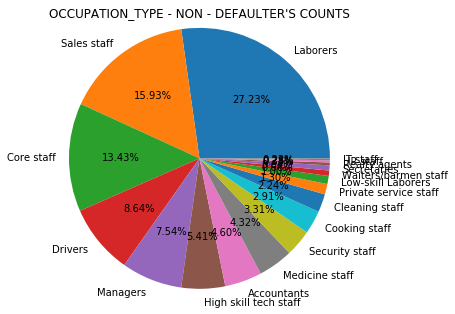

In [21]:
plt.figure(figsize = (10,5))
plt.title("OCCUPATION_TYPE - NON - DEFAULTER'S COUNTS")
plt.pie(list(d0['OCCUPATION_TYPE'].value_counts()),labels = list(d0['OCCUPATION_TYPE'].value_counts().index),
        autopct = "%0.2f%%",radius = 1.2)
plt.show()

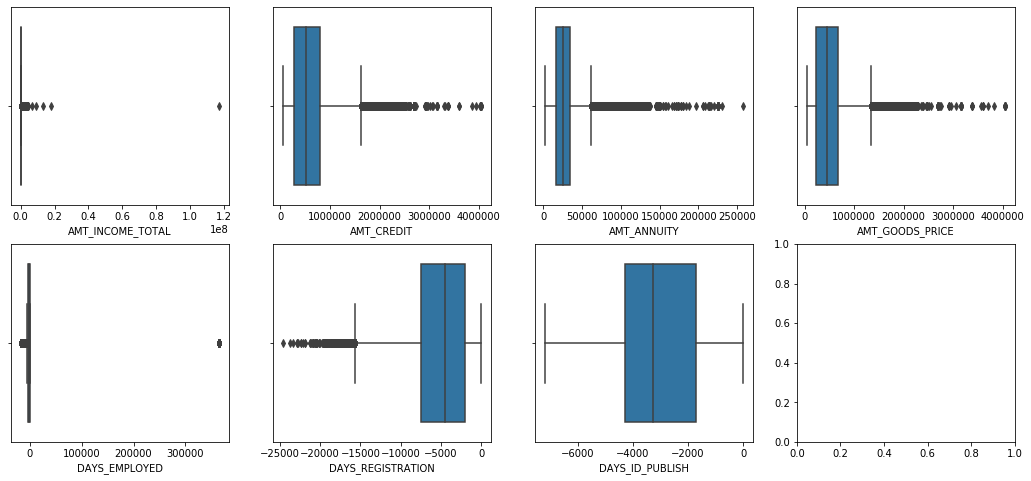

In [22]:
m = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
fig,axes = plt.subplots(2,4,figsize = (18,8))
for i in range(7):
    plt.subplot(2,4,i+1)
    sns.boxplot(data_1[m[i]])
plt.show()

.

### SLIDES - OUTLIER TREATMENT -------------------------------------------------------------------------------------------------------------------

.

### OUTLIERS: IDENTIFICATION & TREATMENT

#### Treatment: QUANTILE CAPPING

dam = data.copy()

m = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
for i in m:
    dam[i] = np.where(dam[i]<dam[i].quantile(0.2),dam[i].quantile(0.2),dam[i])
    dam[i] = np.where(dam[i]>dam[i].quantile(0.8),dam[i].quantile(0.8),dam[i])
    

m = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
fig,axes = plt.subplots(2,4,figsize = (18,8))
for i in range(7):
    plt.subplot(2,4,i+1)
    sns.boxplot(dam[m[i]])
plt.show()

data = dam

data.describe()

data['DAYS_EMPLOYED'].min()

data['DAYS_EMPLOYED'].quantile(0)

.

.

# Logistic Regression (STAGE 1)

In [23]:
p = data.dropna()
p = pd.get_dummies(p)
Xs1 = p.drop(['TARGET'],axis = 1)
ys1 = p['TARGET']


from sklearn.model_selection import train_test_split
X_trains1,X_tests1,y_trains1,y_tests1 = train_test_split(Xs1,ys1,random_state = 355,test_size = 0.3)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report

In [26]:
models1 = LogisticRegression(random_state = 0)
models1.fit(X_trains1, y_trains1)

LogisticRegression(random_state=0)

In [27]:
y_pred_trains1 = models1.predict(X_trains1)

In [28]:
y_preds1 = models1.predict(X_tests1)
y_probs1 = models1.predict_proba(X_tests1)

In [29]:
print("Training accuracy is: ",accuracy_score(y_trains1,y_pred_trains1))
print("Testing accuracy is: ",accuracy_score(y_tests1,y_preds1))

Training accuracy is:  0.9375519016774622
Testing accuracy is:  0.9418829910887253


In [30]:
print("Training ROC AUC score is: ",roc_auc_score(y_trains1,y_pred_trains1))
print("Testing ROC AUC score is: ",roc_auc_score(y_tests1,y_preds1))

Training ROC AUC score is:  0.5
Testing ROC AUC score is:  0.5


In [31]:
print(metrics.classification_report(y_tests1,y_preds1))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2431
           1       0.00      0.00      0.00       150

    accuracy                           0.94      2581
   macro avg       0.47      0.50      0.49      2581
weighted avg       0.89      0.94      0.91      2581



### NULL VALUE: IDENTIFICATION  & TREATMENT

In [10]:
Count = data.isnull().sum().sort_values(ascending = False)
Percentage = (data.isnull().sum().sort_values(ascending = False)*100/len(data)).sort_values(ascending = False)
print(Percentage)

COMMONAREA_AVG              69.872297
COMMONAREA_MEDI             69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
                              ...    
FLAG_DOCUMENT_17             0.000000
FLAG_DOCUMENT_18             0.000000
FLAG_DOCUMENT_19             0.000000
FLAG_DOCUMENT_12             0.000000
TARGET                       0.000000
Length: 121, dtype: float64


In [11]:
# list of columns having more than 40% null

col_to_drop = Percentage[Percentage>40].keys()
print("Columns to drop are: \n",col_to_drop)

Columns to drop are: 
 Index(['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG',
       'YEARS_BUILD_MEDI', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_AVG',
       'LANDAREA_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_AVG',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI', 'ELEVATORS_AVG',
       'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'ENTRANCES_AVG',
       'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'LIVINGAREA_MEDI',
       'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE', 'FLOORSMAX_MEDI',
       'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'YEARS

In [12]:
# Drop columns having greater than 40%  null

data2 =  data.drop(col_to_drop, axis=1)
data_t2 = data_t.drop(col_to_drop, axis=1)

In [13]:
# Checking Of Shape of Dataset after removing the columns

print(data2.shape)
print(data_t2.shape)

(307511, 72)
(48744, 71)


In [14]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

#### Merging columns

In [15]:
df = data2
df1 = data_t2

In [16]:
df["Flag_Documents"] = df["FLAG_DOCUMENT_2"]+ df["FLAG_DOCUMENT_3"]+ df["FLAG_DOCUMENT_4"]+ df["FLAG_DOCUMENT_5"]+ df["FLAG_DOCUMENT_6"]+ df["FLAG_DOCUMENT_7"]+ df["FLAG_DOCUMENT_8"]+ df["FLAG_DOCUMENT_9"]+ df["FLAG_DOCUMENT_10"]+ df["FLAG_DOCUMENT_11"]+ df["FLAG_DOCUMENT_3"]+ df["FLAG_DOCUMENT_12"]+ df["FLAG_DOCUMENT_13"]+ df["FLAG_DOCUMENT_14"]+ df["FLAG_DOCUMENT_15"]+ df["FLAG_DOCUMENT_16"]+ df["FLAG_DOCUMENT_17"]+ df["FLAG_DOCUMENT_18"]+ df["FLAG_DOCUMENT_19"]+ df["FLAG_DOCUMENT_3"]+ df["FLAG_DOCUMENT_20"]+ df["FLAG_DOCUMENT_21"]
df1["Flag_Documents"] = df1["FLAG_DOCUMENT_2"]+ df1["FLAG_DOCUMENT_3"]+ df1["FLAG_DOCUMENT_4"]+ df1["FLAG_DOCUMENT_5"]+ df1["FLAG_DOCUMENT_6"]+ df1["FLAG_DOCUMENT_7"]+ df1["FLAG_DOCUMENT_8"]+ df1["FLAG_DOCUMENT_9"]+ df1["FLAG_DOCUMENT_10"]+ df1["FLAG_DOCUMENT_11"]+ df1["FLAG_DOCUMENT_3"]+ df1["FLAG_DOCUMENT_12"]+ df1["FLAG_DOCUMENT_13"]+ df1["FLAG_DOCUMENT_14"]+ df1["FLAG_DOCUMENT_15"]+ df1["FLAG_DOCUMENT_16"]+ df1["FLAG_DOCUMENT_17"]+ df1["FLAG_DOCUMENT_18"]+ df1["FLAG_DOCUMENT_19"]+ df1["FLAG_DOCUMENT_3"]+ df1["FLAG_DOCUMENT_20"]+ df1["FLAG_DOCUMENT_21"]

In [17]:
df.drop(["FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_3","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"],axis=1,inplace=True)
df1.drop(["FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_3","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"],axis=1,inplace=True)

In [18]:
df.drop(df.index[df['CODE_GENDER'] == 'XNA'], inplace = True)
df1.drop(df1.index[df1['CODE_GENDER'] == 'XNA'], inplace = True)

#### Test-Train Split

In [19]:
X=df.drop(['TARGET'],axis = 1)
y = df['TARGET']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 355,test_size = 0.3)

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215254 entries, 73682 to 121601
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_CONTRACT_TYPE           215254 non-null  object 
 1   CODE_GENDER                  215254 non-null  object 
 2   FLAG_OWN_CAR                 215254 non-null  object 
 3   FLAG_OWN_REALTY              215254 non-null  object 
 4   CNT_CHILDREN                 215254 non-null  int64  
 5   AMT_INCOME_TOTAL             215254 non-null  float64
 6   AMT_CREDIT                   215254 non-null  float64
 7   AMT_ANNUITY                  215243 non-null  float64
 8   AMT_GOODS_PRICE              215063 non-null  float64
 9   NAME_TYPE_SUITE              214349 non-null  object 
 10  NAME_INCOME_TYPE             215254 non-null  object 
 11  NAME_EDUCATION_TYPE          215254 non-null  object 
 12  NAME_FAMILY_STATUS           215254 non-null  object 


In [22]:
X_train.isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       11
AMT_GOODS_PRICE                  191
NAME_TYPE_SUITE                  905
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                67613
CNT_FAM_MEMBERS                    2
R

In [23]:
df1.isna().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       24
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                  911
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                15605
CNT_FAM_MEMBERS                    0
R

#### Imputing with mode (only on catagoric var with missing values < 1000)

In [24]:
X_train['NAME_TYPE_SUITE'].fillna(X_train['NAME_TYPE_SUITE'].value_counts().index[0],inplace=True)
X_test['NAME_TYPE_SUITE'].fillna(X_train['NAME_TYPE_SUITE'].value_counts().index[0],inplace=True)

In [25]:
df1['NAME_TYPE_SUITE'].fillna(df1['NAME_TYPE_SUITE'].value_counts().index[0],inplace=True)

#### Imputing with term 'missing' (only on catagoric var with missing values > 1000)

In [26]:
X_train['OCCUPATION_TYPE'].fillna("Missing",inplace = True)
X_test['OCCUPATION_TYPE'].fillna("Missing",inplace = True)

In [27]:
df1['OCCUPATION_TYPE'].fillna("Missing",inplace = True)

#### Imputing with median (only on numeric var with missing values < 1000)

In [28]:
l= ['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','EXT_SOURCE_2','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']

# Imputing numeric variables with less than 1000 missing values of training dataset by median of train
for i in l:
    X_train[i].fillna(X_train[i].median(),inplace=True)

# Imputing numeric variables with less than 1000 missing values of testing dataset by median of train
for i in l:
    X_test[i].fillna(X_train[i].median(),inplace=True)

In [29]:
l= ['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','EXT_SOURCE_2','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']

# Imputing numeric variables with less than 1000 missing values of training dataset by median of train
for i in l:
    df1[i].fillna(X_train[i].median(),inplace=True)

#### Iterative Imputation (for numeric var > 1000)

In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [31]:
numeric_data = X_train.select_dtypes(include=[np.number])
categorical_data = X_train.select_dtypes(exclude=[np.number])

numeric_data_t = X_test.select_dtypes(include=[np.number])
categorical_data_t = X_test.select_dtypes(exclude=[np.number])

In [32]:
numeric_datat = df1.select_dtypes(include=[np.number])
categorical_datat = df1.select_dtypes(exclude=[np.number])

In [33]:
numeric_datat.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_

In [34]:
lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)

result1=imp.fit_transform(numeric_data)
result2=imp.transform(numeric_data_t)
res = imp.transform(numeric_datat)

[IterativeImputer] Completing matrix with shape (215254, 40)
[IterativeImputer] Ending imputation round 1/10, elapsed time 23.44
[IterativeImputer] Change: 6.508147262338163, scaled tolerance: 117000.0 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (92253, 40)
[IterativeImputer] Ending imputation round 1/1, elapsed time 0.13
[IterativeImputer] Completing matrix with shape (48744, 40)
[IterativeImputer] Ending imputation round 1/1, elapsed time 0.07


In [35]:
t1= pd.DataFrame(result1,columns=numeric_data.columns)
X_train[numeric_data.columns] = t1[numeric_data.columns].values

t2= pd.DataFrame(result2,columns=numeric_data_t.columns)
X_test[numeric_data_t.columns] = t2[numeric_data_t.columns].values

In [36]:
t= pd.DataFrame(res,columns=numeric_datat.columns)
df1[numeric_datat.columns] = t[numeric_datat.columns].values

In [37]:
# All null values treated
print("Null values in\nTrain data: ",X_train.isnull().sum().sum(),"\nTest Data: ",X_test.isnull().sum().sum())

Null values in
Train data:  0 
Test Data:  0


In [38]:
# All null values treated
print("Null values in\nTesting data: ",df1.isnull().sum().sum())

Null values in
Testing data:  0


### ENCODING: WEIGHT OF EVIDENCE (WOE)

#### Converting the numeric data into catagoric 

In [39]:
am = X_train.copy()
am1 = X_test.copy()
m = df1.copy()
am = am.reset_index()
am1 = am1.reset_index()
m = m.reset_index()
X_train = X_train.reset_index()
X_test = X_test.reset_index()
df1 = df1.reset_index()

am.drop(['index'],axis = 1,inplace = True)
am1.drop(['index'],axis = 1,inplace = True)
m.drop(['index'],axis = 1,inplace = True)
X_train.drop(['index'],axis = 1,inplace = True)
X_test.drop(['index'],axis = 1,inplace = True)
df1.drop(['index'],axis = 1,inplace = True)

In [40]:
j = ['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
for i in j:
    am[i] = -am[i]

for i in j:
    am1[i] = -am1[i]

for i in j:
    m[i] = -m[i]
m[j]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,19241.0,2329.0,5170.0,812.0,1740.0
1,18064.0,4469.0,9118.0,1623.0,-0.0
2,20038.0,4458.0,2175.0,3503.0,856.0
3,13976.0,1866.0,2000.0,4208.0,1805.0
4,13040.0,2191.0,4000.0,4262.0,821.0
...,...,...,...,...,...
48739,19970.0,5169.0,9094.0,3399.0,684.0
48740,11186.0,1149.0,3015.0,3003.0,-0.0
48741,15922.0,3037.0,2681.0,1504.0,838.0
48742,13968.0,2731.0,1461.0,1364.0,2308.0


In [41]:
am['AMT_INCOME_TOTAL']

0         112500.0
1         100350.0
2         225000.0
3         103500.0
4         126000.0
            ...   
215249    202500.0
215250     72000.0
215251    157500.0
215252    135000.0
215253    166500.0
Name: AMT_INCOME_TOTAL, Length: 215254, dtype: float64

In [42]:
(am['AMT_INCOME_TOTAL'].sort_values(ascending = False)>2500000).sum()

14

In [43]:
ser_3 = []
for i in range(am.shape[0]):
    if 0 <(am['AMT_INCOME_TOTAL'][i])<= 250000:
        ser_3.append('0 to INR 250000 ')
    if 250000 < am['AMT_INCOME_TOTAL'][i] <= 500000:
        ser_3.append('250000 to INR 500000 ')
    if 500000 < am['AMT_INCOME_TOTAL'][i] <= 750000:
        ser_3.append('500000 to INR 750000 ')
    if 750000 < am['AMT_INCOME_TOTAL'][i] <= 1000000:
        ser_3.append('750000 to INR 1000000 ')
    if 1000000 < am['AMT_INCOME_TOTAL'][i] <= 1250000:
        ser_3.append('1000000 to INR 1250000 ')
    if 1250000 < am['AMT_INCOME_TOTAL'][i] <= 1500000:
        ser_3.append('1250000 to INR 1500000 ')
    if 1500000 < am['AMT_INCOME_TOTAL'][i] <= 1750000:
        ser_3.append('1500000 to INR 1750000 ')
    if 1750000 < am['AMT_INCOME_TOTAL'][i] <= 2000000:
        ser_3.append('1750000 to INR 2000000 ')
    if 2000000 < am['AMT_INCOME_TOTAL'][i] <= 2250000:
        ser_3.append('2000000 to INR 2250000 ')
    if 2250000 < am['AMT_INCOME_TOTAL'][i] <= 2500000:
        ser_3.append('2250000 to INR 2500000 ')
    if 2500000 < am['AMT_INCOME_TOTAL'][i] :
        ser_3.append('INR 2500000 above')
    
    
am['AMT_INCOME_TOTAL'] = ser_3 


In [44]:
ser_3 = []
for i in range(am1.shape[0]):
    if 0 <(am1['AMT_INCOME_TOTAL'][i])<= 250000:
        ser_3.append('0 to INR 250000 ')
    if 250000 < am1['AMT_INCOME_TOTAL'][i] <= 500000:
        ser_3.append('250000 to INR 500000 ')
    if 500000 < am1['AMT_INCOME_TOTAL'][i] <= 750000:
        ser_3.append('500000 to INR 750000 ')
    if 750000 < am1['AMT_INCOME_TOTAL'][i] <= 1000000:
        ser_3.append('750000 to INR 1000000 ')
    if 1000000 < am1['AMT_INCOME_TOTAL'][i] <= 1250000:
        ser_3.append('1000000 to INR 1250000 ')
    if 1250000 < am1['AMT_INCOME_TOTAL'][i] <= 1500000:
        ser_3.append('1250000 to INR 1500000 ')
    if 1500000 < am1['AMT_INCOME_TOTAL'][i] <= 1750000:
        ser_3.append('1500000 to INR 1750000 ')
    if 1750000 < am1['AMT_INCOME_TOTAL'][i] <= 2000000:
        ser_3.append('1750000 to INR 2000000 ')
    if 2000000 < am1['AMT_INCOME_TOTAL'][i] <= 2250000:
        ser_3.append('2000000 to INR 2250000 ')
    if 2250000 < am1['AMT_INCOME_TOTAL'][i] <= 2500000:
        ser_3.append('2250000 to INR 2500000 ')
    if 2500000 < am1['AMT_INCOME_TOTAL'][i] :
        ser_3.append('INR 2500000 above')
    
    
am1['AMT_INCOME_TOTAL'] = ser_3 


In [45]:
ser_3 = []
for i in range(m.shape[0]):
    if 0 <(m['AMT_INCOME_TOTAL'][i])<= 250000:
        ser_3.append('0 to INR 250000 ')
    if 250000 < m['AMT_INCOME_TOTAL'][i] <= 500000:
        ser_3.append('250000 to INR 500000 ')
    if 500000 < m['AMT_INCOME_TOTAL'][i] <= 750000:
        ser_3.append('500000 to INR 750000 ')
    if 750000 < m['AMT_INCOME_TOTAL'][i] <= 1000000:
        ser_3.append('750000 to INR 1000000 ')
    if 1000000 < m['AMT_INCOME_TOTAL'][i] <= 1250000:
        ser_3.append('1000000 to INR 1250000 ')
    if 1250000 < m['AMT_INCOME_TOTAL'][i] <= 1500000:
        ser_3.append('1250000 to INR 1500000 ')
    if 1500000 < m['AMT_INCOME_TOTAL'][i] <= 1750000:
        ser_3.append('1500000 to INR 1750000 ')
    if 1750000 < m['AMT_INCOME_TOTAL'][i] <= 2000000:
        ser_3.append('1750000 to INR 2000000 ')
    if 2000000 < m['AMT_INCOME_TOTAL'][i] <= 2250000:
        ser_3.append('2000000 to INR 2250000 ')
    if 2250000 < m['AMT_INCOME_TOTAL'][i] <= 2500000:
        ser_3.append('2250000 to INR 2500000 ')
    if 2500000 < m['AMT_INCOME_TOTAL'][i] :
        ser_3.append('INR 2500000 above')
    
    
m['AMT_INCOME_TOTAL'] = ser_3 


In [46]:
X_train['AMT_INCOME_TOTAL'] = am['AMT_INCOME_TOTAL']
X_test['AMT_INCOME_TOTAL'] = am1['AMT_INCOME_TOTAL']
df1['AMT_INCOME_TOTAL'] = m['AMT_INCOME_TOTAL']

In [47]:
X_train['AMT_INCOME_TOTAL'].value_counts()

0 to INR 250000            187385
250000 to INR 500000        25960
500000 to INR 750000         1447
750000 to INR 1000000         284
1000000 to INR 1250000         71
1250000 to INR 1500000         45
2000000 to INR 2250000         16
1500000 to INR 1750000         16
1750000 to INR 2000000         15
INR 2500000 above              14
2250000 to INR 2500000          1
Name: AMT_INCOME_TOTAL, dtype: int64

In [48]:
X_train.nunique()

NAME_CONTRACT_TYPE                  2
CODE_GENDER                         2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       13
AMT_INCOME_TOTAL                   11
AMT_CREDIT                       5155
AMT_ANNUITY                     12820
AMT_GOODS_PRICE                   859
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17375
DAYS_EMPLOYED                   11745
DAYS_REGISTRATION               15249
DAYS_ID_PUBLISH                  6112
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
OCCUPATION_TYPE                    19
CNT_FAM_MEMB

In [49]:
X_train.dtypes

NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                   float64
AMT_INCOME_TOTAL                object
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                     float64
DAYS_EMPLOYED                  float64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                float64
FLAG_MOBIL                     float64
FLAG_EMP_PHONE                 float64
FLAG_WORK_PHONE                float64
FLAG_CONT_MOBILE               float64
FLAG_PHONE                     float64
FLAG_EMAIL                     float64
OCCUPATION_TYPE          

In [50]:
X_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Flag_Documents
0,Cash loans,M,N,Y,0.0,0 to INR 250000,675000.0,26901.0,675000.0,Unaccompanied,...,0.0,0.0,-1380.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,Cash loans,F,N,Y,1.0,0 to INR 250000,477792.0,13266.0,378000.0,Unaccompanied,...,0.0,0.0,-1053.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,Cash loans,F,N,Y,1.0,0 to INR 250000,254700.0,16407.0,225000.0,Unaccompanied,...,5.0,0.0,-1428.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0
3,Cash loans,M,Y,Y,0.0,0 to INR 250000,239850.0,23850.0,225000.0,Unaccompanied,...,5.0,0.0,-2447.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0
4,Cash loans,F,N,Y,0.0,0 to INR 250000,324000.0,23706.0,324000.0,Unaccompanied,...,3.0,0.0,-3563.0,0.0,0.0,0.0,0.0,1.0,8.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215249,Cash loans,F,N,Y,1.0,0 to INR 250000,450000.0,21888.0,450000.0,Unaccompanied,...,0.0,0.0,-908.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
215250,Cash loans,F,Y,Y,0.0,0 to INR 250000,81000.0,8505.0,81000.0,Unaccompanied,...,0.0,0.0,-2370.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0
215251,Cash loans,M,Y,Y,0.0,0 to INR 250000,808650.0,23773.5,675000.0,Unaccompanied,...,1.0,1.0,-1938.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
215252,Revolving loans,M,Y,N,0.0,0 to INR 250000,180000.0,9000.0,180000.0,Unaccompanied,...,4.0,1.0,-1472.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [51]:
l = ['CNT_CHILDREN','FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','CNT_FAM_MEMBERS', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','Flag_Documents']
X_train[l] = X_train[l].astype(object)
X_test[l] = X_test[l].astype(object)  
df1[l] = df1[l].astype(object)  

In [52]:
X_train['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.0     197333
1.0      15161
2.0       2237
3.0        413
4.0         92
5.0         15
24.0         1
6.0          1
7.0          1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [53]:
def bin32_o(m,li):
    for a in li:
        ser_3 = []
        for i in range(m.shape[0]):
            if (m[a][i]) == 0:
                ser_3.append('0')
            if (m[a][i]) == 1:
                ser_3.append('1')
            if (m[a][i]) == 2:
                ser_3.append('2')
            if (m[a][i]) == 3:
                ser_3.append('3')
            if (m[a][i]) == 4:
                ser_3.append('4')
            if (m[a][i]) == 5:
                ser_3.append('5')
            if (m[a][i]) >= 6:
                ser_3.append('above 6')
        m[a] = ser_3 


In [54]:
l = ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
bin32_o(X_train,l)
bin32_o(X_test,l)
bin32_o(df1,l)

In [55]:
X_train[l].nunique()

OBS_30_CNT_SOCIAL_CIRCLE    7
DEF_30_CNT_SOCIAL_CIRCLE    7
OBS_60_CNT_SOCIAL_CIRCLE    7
DEF_60_CNT_SOCIAL_CIRCLE    7
dtype: int64

In [56]:
num_not = ['TARGET','AMT_INCOME_TOTAL']

In [57]:
li = [i for i in am.columns if X_train[i].dtype != 'object' and i not in num_not]

In [58]:
li

['AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [59]:
am[li].describe()

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,2.152540e+05,215254.000000,2.152540e+05,215254.000000,215254.000000,215254.000000,215254.000000,215254.000000,215254.000000,215254.000000,215254.000000,2.152540e+05,215254.000000,215254.00000,215254.000000,215254.000000,215254.000000,215254.000000,215254.000000,215254.000000
mean,5.990007e+05,27108.066354,5.382498e+05,0.020887,16042.278030,-63974.238537,4984.923254,2995.516989,2.051158,2.030281,12.063943,5.143337e-01,0.508442,961.04123,0.006440,0.007047,0.034660,0.264280,0.265253,1.894787
std,4.025972e+05,14493.389027,3.694801e+05,0.013856,4365.096177,141407.386823,3523.325296,1509.224813,0.509395,0.503165,3.268267,1.908358e-01,0.176164,825.13371,0.077969,0.104526,0.191174,0.853538,0.799368,1.745925
min,4.500000e+04,1615.500000,4.050000e+04,0.000290,7673.000000,-365243.000000,-0.000000,-0.000000,1.000000,1.000000,0.000000,8.170000e-08,-1.432957,-0.00000,-0.002040,-0.008150,-0.008431,-0.123393,-0.054786,-2.864030
25%,2.700000e+05,16524.000000,2.385000e+05,0.010006,12411.000000,288.000000,2009.000000,1722.000000,2.000000,2.000000,10.000000,3.924092e-01,0.404909,273.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5.130000e+05,24903.000000,4.500000e+05,0.018850,15748.000000,1215.000000,4499.000000,3259.000000,2.000000,2.000000,12.000000,5.657251e-01,0.519097,756.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.805155
75%,8.086500e+05,34596.000000,6.795000e+05,0.028663,19696.000000,2764.000000,7482.000000,4299.000000,2.000000,2.000000,14.000000,6.633095e-01,0.634706,1568.00000,0.000000,0.000000,0.000000,0.159712,0.254134,3.000000
max,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,17583.000000,24672.000000,6337.000000,3.000000,3.000000,23.000000,8.549997e-01,1.154061,4292.00000,4.000000,9.000000,8.000000,23.000000,261.000000,25.000000


In [60]:
l1 = pd.DataFrame()
for i in li:
    l1[i] = pd.cut(am[i],bins = 5)
    l1[i] = l1[i].astype(str)
    
l2 = pd.DataFrame()
for i in li:
    l2[i] = pd.cut(am1[i],bins = 5)
    l2[i] = l2[i].astype(str)
    
l3 = pd.DataFrame()
for i in li:
    l3[i] = pd.cut(m[i],bins = 5)
    l3[i] = l3[i].astype(str)

In [61]:
X_train[li] = l1[li]
X_test[li] = l2[li]
df1[li] = l3[li]


In [62]:
li

['AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [63]:
X_train[li].isna().sum()

AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START        0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
DAYS_LAST_PHONE_CHANGE         0
AMT_REQ_CREDIT_BUREAU_HOUR     0
AMT_REQ_CREDIT_BUREAU_DAY      0
AMT_REQ_CREDIT_BUREAU_WEEK     0
AMT_REQ_CREDIT_BUREAU_MON      0
AMT_REQ_CREDIT_BUREAU_QRT      0
AMT_REQ_CREDIT_BUREAU_YEAR     0
dtype: int64

In [64]:
X_train.isna().sum().sum()

0

In [65]:
from feature_engine.encoding import RareLabelEncoder,WoEEncoder

In [66]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92253 entries, 0 to 92252
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   NAME_CONTRACT_TYPE           92253 non-null  object
 1   CODE_GENDER                  92253 non-null  object
 2   FLAG_OWN_CAR                 92253 non-null  object
 3   FLAG_OWN_REALTY              92253 non-null  object
 4   CNT_CHILDREN                 92253 non-null  object
 5   AMT_INCOME_TOTAL             92253 non-null  object
 6   AMT_CREDIT                   92253 non-null  object
 7   AMT_ANNUITY                  92253 non-null  object
 8   AMT_GOODS_PRICE              92253 non-null  object
 9   NAME_TYPE_SUITE              92253 non-null  object
 10  NAME_INCOME_TYPE             92253 non-null  object
 11  NAME_EDUCATION_TYPE          92253 non-null  object
 12  NAME_FAMILY_STATUS           92253 non-null  object
 13  NAME_HOUSING_TYPE            92

In [67]:
y_train = y_train.reset_index()
y_train.drop(['index'],axis = 1,inplace = True)

In [68]:
X_train.drop(['FLAG_MOBIL'],axis = 1,inplace = True)
X_test.drop(['FLAG_MOBIL'],axis = 1,inplace = True)
df1.drop(['FLAG_MOBIL'],axis = 1,inplace = True)

In [69]:
X_train.dtypes

NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                   object
AMT_INCOME_TOTAL               object
AMT_CREDIT                     object
AMT_ANNUITY                    object
AMT_GOODS_PRICE                object
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE     object
DAYS_BIRTH                     object
DAYS_EMPLOYED                  object
DAYS_REGISTRATION              object
DAYS_ID_PUBLISH                object
FLAG_EMP_PHONE                 object
FLAG_WORK_PHONE                object
FLAG_CONT_MOBILE               object
FLAG_PHONE                     object
FLAG_EMAIL                     object
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS                object
REGION_RATIN

In [88]:
g.shape

(11, 3)

In [84]:
g = X_train.copy()

In [85]:
def wm(n):
    for i in n.columns:
        n['y'] = y_train
        a = (n[i].value_counts()).reset_index()
        al = n[n[i] == a.loc[a.shape[0]-1,'index']]
        if sum(al['y']) <= 5:
            n.drop(['y'],axis = 1,inplace = True)
            n[i] = np.where(n[i]==a.loc[a.shape[0]-1,'index'],a.loc[a.shape[0]-2,'index'],n[i])
            return(wm(n))
    n.drop(['y'],axis = 1,inplace = True)
    return(n)

In [86]:
a = wm(g)

RecursionError: maximum recursion depth exceeded while calling a Python object

In [ ]:
a.head()

In [ ]:
a['CNT_CHILDREN'].value_counts()

In [ ]:
str(a.loc[a.shape[0]-1,'index'])

In [ ]:
a.head()

In [ ]:
a.dtypes

In [ ]:
X_train = a

In [ ]:
woe_encoder = WoEEncoder(variables=list(X_train.columns))

# fit the encoder
woe_encoder.fit(X_train,y_train)

In [ ]:
woe_encoder.encoder_dict_

In [106]:
woe_df = pd.DataFrame(woe_encoder.encoder_dict_)

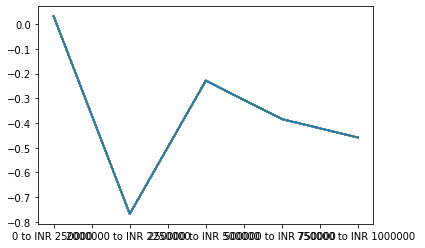

In [111]:
for i in woe_df.columns:
    woe_df['AMT_INCOME_TOTAL'].dropna(inplace =True)
    woe_df['AMT_INCOME_TOTAL'].plot()

In [98]:
# transform
X_train = woe_encoder.transform(X_train)
X_test = woe_encoder.transform(X_test)

In [99]:
# transform
df1 = woe_encoder.transform(df1)

In [100]:
df1.shape[0]

48744

In [104]:
X_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Flag_Documents
0,0.035523,0.253784,0.055054,-0.008616,-0.052735,0.031982,0.07323,0.018471,0.074842,0.010345,...,-0.025673,-0.032757,-0.125580,0.000648,0.000037,0.00002,0.002705,0.0,-0.013499,0.112161
1,0.035523,-0.156449,0.055054,-0.008616,0.108895,0.031982,0.07323,0.018471,0.074842,0.010345,...,-0.025673,-0.032757,-0.125580,0.000648,0.000037,0.00002,0.002705,0.0,-0.013499,0.112161
2,0.035523,-0.156449,0.055054,-0.008616,0.108895,0.031982,0.07323,0.018471,0.074842,0.010345,...,0.059433,-0.032757,-0.125580,0.000648,0.000037,0.00002,0.002705,0.0,0.033384,0.112161
3,0.035523,0.253784,-0.114634,-0.008616,-0.052735,0.031982,0.07323,0.018471,0.074842,0.010345,...,0.059433,-0.032757,-0.327718,0.000648,0.000037,0.00002,0.002705,0.0,0.033384,0.112161
4,0.035523,-0.156449,0.055054,-0.008616,-0.052735,0.031982,0.07323,0.018471,0.074842,0.010345,...,0.031698,-0.032757,-0.480181,0.000648,0.000037,0.00002,0.002705,0.0,0.033384,0.112161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215249,0.035523,-0.156449,0.055054,-0.008616,0.108895,0.031982,0.07323,0.018471,0.074842,0.010345,...,-0.025673,-0.032757,-0.125580,0.000648,0.000037,0.00002,0.002705,0.0,-0.013499,0.112161
215250,0.035523,-0.156449,-0.114634,-0.008616,-0.052735,0.031982,0.07323,0.018471,0.074842,0.010345,...,-0.025673,-0.032757,-0.327718,0.000648,0.000037,0.00002,0.002705,0.0,-0.013499,0.112161
215251,0.035523,0.253784,-0.114634,-0.008616,-0.052735,0.031982,0.07323,0.018471,0.074842,0.010345,...,-0.019361,0.285016,-0.327718,0.000648,0.000037,0.00002,0.002705,0.0,0.033384,0.112161
215252,-0.404422,0.253784,-0.114634,0.019319,-0.052735,0.031982,0.07323,0.018471,0.074842,0.010345,...,0.082286,0.285016,-0.125580,0.000648,0.000037,0.00002,0.002705,0.0,-0.013499,-0.395787


.

.

### FEATURE SELECTION: INFORMATION VALUE (IV)

In [101]:
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [102]:
final_iv, IV = data_vars(X_train,y_train)

ValueError: Data must be 1-dimensional

In [103]:
IV = IV.rename(columns={'VAR_NAME':'index'})

NameError: name 'IV' is not defined

In [72]:
l = IV.sort_values(['IV'],ascending=0)['index'].to_list()

In [73]:
l

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_BIRTH',
 'OCCUPATION_TYPE',
 'DAYS_LAST_PHONE_CHANGE',
 'NAME_INCOME_TYPE',
 'CODE_GENDER',
 'ORGANIZATION_TYPE',
 'DAYS_ID_PUBLISH',
 'AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'REGION_RATING_CLIENT',
 'DAYS_REGISTRATION',
 'REG_CITY_NOT_LIVE_CITY',
 'NAME_FAMILY_STATUS',
 'DAYS_EMPLOYED',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'NAME_CONTRACT_TYPE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'NAME_HOUSING_TYPE',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_OWN_CAR',
 'REGION_POPULATION_RELATIVE',
 'HOUR_APPR_PROCESS_START',
 'Flag_Documents',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_FAM_MEMBERS',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_INCOME_TOTAL',
 'NAME_EDUCATION_TYPE',
 'AMT_CREDIT',
 'CNT_CHILDREN',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'WEEKDAY_APPR_PROCESS_START',
 'AMT_ANNUITY',
 'REG_REGION_NOT_WORK_REGIO

In [74]:
print(X_test[l[:30]].columns)

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH', 'OCCUPATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'NAME_INCOME_TYPE', 'CODE_GENDER',
       'ORGANIZATION_TYPE', 'DAYS_ID_PUBLISH', 'AMT_GOODS_PRICE',
       'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT_W_CITY',
       'REG_CITY_NOT_WORK_CITY', 'REGION_RATING_CLIENT', 'DAYS_REGISTRATION',
       'REG_CITY_NOT_LIVE_CITY', 'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'NAME_CONTRACT_TYPE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_HOUSING_TYPE',
       'LIVE_CITY_NOT_WORK_CITY', 'FLAG_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_OWN_CAR', 'REGION_POPULATION_RELATIVE', 'HOUR_APPR_PROCESS_START',
       'Flag_Documents', 'DEF_30_CNT_SOCIAL_CIRCLE'],
      dtype='object')


In [75]:
# Performing Feature selection and selecting top 30 columns from the list 

X_train = X_train[l[:30]]
X_test = X_test[l[:30]]

In [76]:
# Performing Feature selection and selecting top 30 columns from the list 

df1 = df1[l[:30]]


### MULTICOLLINEARLITY CHECK

In [77]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.5
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Drop features 
X_train.drop(to_drop, axis=1, inplace=True)

In [78]:
# Drop features 
df1.drop(to_drop, axis=1, inplace=True)

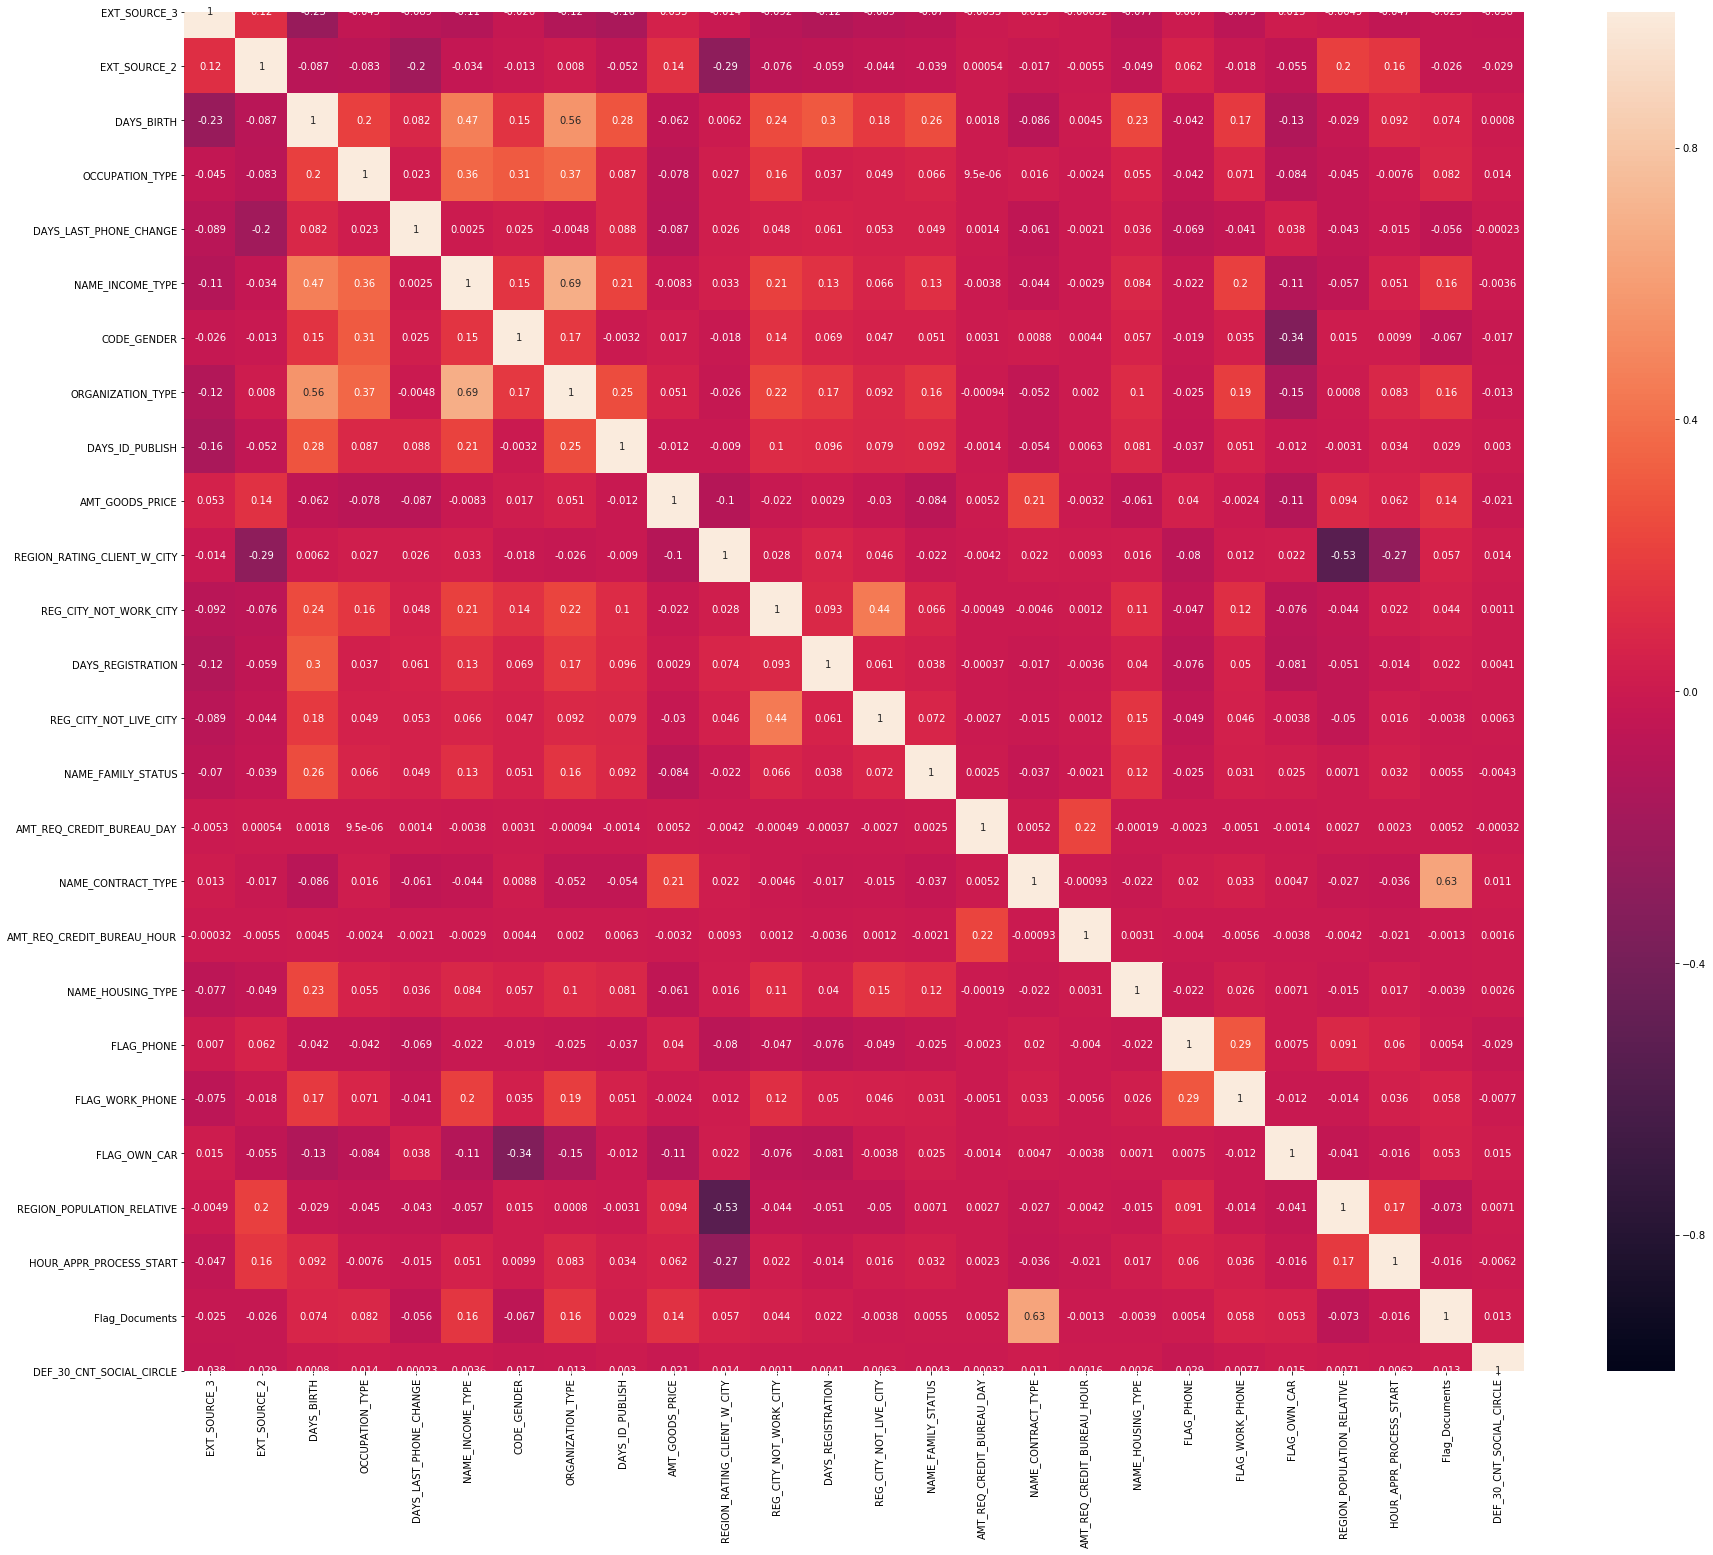

In [79]:
plt.figure(figsize=(30,25))
sns.heatmap(X_train.corr(),annot = True,vmin = -1,vmax = 1)
plt.show()

In [80]:
l3= X_train.columns.to_list()

In [81]:
X_test = X_test[l3]

In [82]:
print(list(X_train.columns) == list(X_test.columns)) 

True


### SCALING

In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
#,'AMT_INCOME_TOTAL','REG_REGION_NOT_WORK_REGION' added for 0.7
l  = ['DAYS_BIRTH','DAYS_ID_PUBLISH','REGION_POPULATION_RELATIVE','DAYS_LAST_PHONE_CHANGE','DAYS_REGISTRATION','AMT_GOODS_PRICE','REG_CITY_NOT_WORK_CITY','REGION_RATING_CLIENT_W_CITY','REG_CITY_NOT_LIVE_CITY']
scaler = MinMaxScaler()
X_train.loc[:,l] = scaler.fit_transform(X_train.loc[:,l])
X_test.loc[:,l] = scaler.transform(X_test.loc[:,l])
    

In [85]:
df1.loc[:,l] = scaler.transform(df1.loc[:,l])    

In [86]:
X_train

,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_BIRTH,OCCUPATION_TYPE,DAYS_LAST_PHONE_CHANGE,NAME_INCOME_TYPE,CODE_GENDER,ORGANIZATION_TYPE,DAYS_ID_PUBLISH,AMT_GOODS_PRICE,...,NAME_CONTRACT_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,NAME_HOUSING_TYPE,FLAG_PHONE,FLAG_WORK_PHONE,FLAG_OWN_CAR,REGION_POPULATION_RELATIVE,HOUR_APPR_PROCESS_START,Flag_Documents,DEF_30_CNT_SOCIAL_CIRCLE
73682,0.243186,0.684152,0.215368,0.298082,0.678472,0.184792,0.253784,0.148624,0.240110,0.541872,...,0.035523,0.0,-0.039515,1.0,1.0,0.055054,0.336758,16.0,3.0,0.0
204563,0.621226,0.403164,0.864605,-0.257508,0.754660,-0.081071,-0.156449,0.016931,0.697046,0.216749,...,0.035523,0.0,-0.039515,0.0,0.0,0.055054,0.276330,10.0,3.0,0.0
243940,0.292588,0.379049,0.823821,-0.274524,0.667288,-0.081071,-0.156449,0.016931,0.778418,0.049261,...,0.035523,0.0,-0.039515,0.0,0.0,0.055054,0.311695,13.0,3.0,0.0
54995,0.625537,0.736427,0.014867,-0.225002,0.429870,-0.407830,0.253784,-0.404203,0.073110,0.049261,...,0.035523,0.0,-0.039515,1.0,0.0,-0.114634,0.048852,9.0,3.0,0.0
183896,0.263647,0.516211,0.593301,-0.525105,0.169851,-0.380586,-0.156449,-0.231859,0.048322,0.157635,...,0.035523,0.0,-0.039515,0.0,0.0,0.055054,0.206749,8.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72997,0.203252,0.692437,0.742652,0.180642,0.788444,0.184792,-0.156449,0.148624,0.056084,0.295567,...,0.035523,0.0,-0.039515,1.0,1.0,0.055054,0.361433,19.0,3.0,0.0
286201,0.508287,0.609479,0.821315,-0.525105,0.447810,-0.081071,-0.156449,0.016931,0.516274,0.000000,...,0.035523,0.0,0.419980,1.0,0.0,-0.114634,0.361433,9.0,3.0,0.0
257374,0.557666,0.262258,0.225906,0.366267,0.548462,-0.081071,0.253784,0.148624,0.000000,0.541872,...,0.035523,0.0,-0.039515,0.0,0.0,-0.114634,0.344429,11.0,3.0,1.0
150149,0.424130,0.616327,0.709102,0.298082,0.657036,0.184792,0.253784,0.148624,0.939910,0.000000,...,-0.404422,0.0,-0.039515,0.0,0.0,-0.114634,0.048783,11.0,0.0,1.0


### IMBALANCE TREATMENT

In [87]:
from imblearn.over_sampling import RandomOverSampler

In [88]:
# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

# MODELLING

In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

# Logistic Regression (STAGE 2)

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
model1 = LogisticRegression(random_state = 0)
model1.fit(X_train_res, y_train_res)

LogisticRegression(random_state=0)

In [92]:
y_pred_train1 = model1.predict(X_train_res)

In [93]:
y_pred1 = model1.predict(X_test)
y_prob1 = model1.predict_proba(X_test)

In [94]:
print("Training accuracy is: ",accuracy_score(y_train_res,y_pred_train1))
print("Testing accuracy is: ",accuracy_score(y_test,y_pred1))

Training accuracy is:  0.673036673036673
Testing accuracy is:  0.682416831972944


In [95]:
print("Training ROC AUC score is: ",roc_auc_score(y_train_res,y_pred_train1))
print("Testing ROC AUC score is: ",roc_auc_score(y_test,y_pred1))

Training ROC AUC score is:  0.673036673036673
Testing ROC AUC score is:  0.6727281942814761


In [96]:
print(metrics.classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.68      0.80     84880
           1       0.15      0.66      0.25      7373

    accuracy                           0.68     92253
   macro avg       0.56      0.67      0.52     92253
weighted avg       0.89      0.68      0.75     92253



# XG Boost

In [97]:
from xgboost import XGBClassifier

In [98]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe 

In [99]:
# xgboost

space = {'max_depth': hp.quniform("max_depth", 3,18,1),
         'gamma': hp.uniform('gamma', 1,9), 
         'reg_alpha' : hp.quniform('reg_alpha', 40,180,1), 
         'reg_lambda' : hp.uniform('reg_lambda', 0,1), 
         'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1), 
         'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1), 
         'n_estimators': 300, 
         'seed': 0
        }

def objective (space): 
    clf=XGBClassifier(n_estimators = int(space['n_estimators']),
                          max_depth = int(space['max_depth']), gamma = space['gamma'],
                          reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                          colsample_bytreerint =  (space['colsample_bytree']))
    evaluation = [( X_train_res, y_train_res), ( X_test, y_test)]
    clf.fit(X_train_res, y_train_res, eval_set=evaluation, eval_metric="auc", early_stopping_rounds=10, verbose=False)
    pred = clf.predict(X_test) 
    y_score = clf.predict_proba(X_test)[:,1] 
    accuracy = accuracy_score(y_test, pred>0.5) 
    Roc_Auc_Score = roc_auc_score(y_test, y_score) 
    print ("ROC-AUC Score:", Roc_Auc_Score) 
    print ("SCORE:", accuracy) 
    return {'loss': -Roc_Auc_Score, 'status': STATUS_OK }


In [100]:
trials = Trials() 
best_hyperparams = fmin(fn = objective, space = space, 
                        algo = tpe.suggest, max_evals = 100,
                        trials = trials) 
print("The best hyperparameters are : ","\n") 
print(best_hyperparams)

[13:38:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627:                   
Parameters: { "colsample_bytreerint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


ROC-AUC Score:                                                                                                         
0.7367692278536725                                                                                                     
SCORE:                                                                                                                 
0.7086165219559255                                                                                                     
[13:40:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_releas

ROC-AUC Score:                                                                                                         
0.7372486370846683                                                                                                     
SCORE:                                                                                                                 
0.7042155810651144                                                                                                     
[13:57:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627:                   
Parameters: { "colsample_bytreerint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


ROC-AUC Score:                                                           


ROC-AUC Score:                                                                                                         
0.7401225166511073                                                                                                     
SCORE:                                                                                                                 
0.6982320358145535                                                                                                     
[14:06:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627:                   
Parameters: { "colsample_bytreerint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


ROC-AUC Score:                                                          


ROC-AUC Score:                                                                                                         
0.7387602284962851                                                                                                     
SCORE:                                                                                                                 
0.698069439476223                                                                                                      
[14:12:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627:                   
Parameters: { "colsample_bytreerint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


ROC-AUC Score:                                                          


ROC-AUC Score:                                                                                                         
0.7416630732492768                                                                                                     
SCORE:                                                                                                                 
0.6956955329365982                                                                                                     
[14:18:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627:                   
Parameters: { "colsample_bytreerint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


ROC-AUC Score:                                                          


ROC-AUC Score:                                                                                                         
0.7392012281354148                                                                                                     
SCORE:                                                                                                                 
0.7018958733049332                                                                                                     
[14:24:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627:                   
Parameters: { "colsample_bytreerint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


ROC-AUC Score:                                                          


ROC-AUC Score:                                                                                                         
0.7411325399127391                                                                                                     
SCORE:                                                                                                                 
0.6973540155875689                                                                                                     
[14:31:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627:                   
Parameters: { "colsample_bytreerint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


ROC-AUC Score:                                                          


ROC-AUC Score:                                                                                                         
0.7394266474986492                                                                                                     
SCORE:                                                                                                                 
0.7050502422685441                                                                                                     
[14:37:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627:                   
Parameters: { "colsample_bytreerint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


ROC-AUC Score:                                                          


ROC-AUC Score:                                                                                                         
0.7382489131383798                                                                                                     
SCORE:                                                                                                                 
0.7018850335490445                                                                                                     
[14:46:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627:                   
Parameters: { "colsample_bytreerint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


ROC-AUC Score:                                                          


ROC-AUC Score:                                                                                                         
0.7405170852256232                                                                                                     
SCORE:                                                                                                                 
0.7035435162000152                                                                                                     
[14:54:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627:                   
Parameters: { "colsample_bytreerint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


ROC-AUC Score:                                                          


ROC-AUC Score:                                                                                                         
0.7344353523944831                                                                                                     
SCORE:                                                                                                                 
0.7180362698232036                                                                                                     
[15:01:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627:                   
Parameters: { "colsample_bytreerint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


ROC-AUC Score:                                                          

In [101]:
#{'colsample_bytree': 0.8006867785320115, 'gamma': 3.1188192708275064, 'max_depth': 4.0, 'min_child_weight': 5.0, 'reg_alpha': 133.0, 'reg_lambda': 0.6374012888856481}

model2 = XGBClassifier(n_estimators = space['n_estimators'],max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
                          reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
                          colsample_bytreerint = (best_hyperparams['colsample_bytree']))

# fit the model with the training data
model2.fit(X_train_res,y_train_res)

[15:02:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytreerint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              colsample_bytreerint=0.5463080074125273,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=4.759977263836118, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=87, ...)

In [102]:
y_pred_train2 = model2.predict(X_train_res)

In [103]:
y_pred2 = model2.predict(X_test)
y_prob2 = model2.predict_proba(X_test)

In [104]:
print("Training accuracy is: ",accuracy_score(y_train_res,y_pred_train2))
print("Testing accuracy is: ",accuracy_score(y_test,y_pred2))

Training accuracy is:  0.7072476516920961
Testing accuracy is:  0.7003566279687381


In [105]:
print("Training ROC AUC score is: ",roc_auc_score(y_train_res,y_pred_train2))
print("Testing ROC AUC score is: ",roc_auc_score(y_test,y_pred2))

Training ROC AUC score is:  0.7072476516920961
Testing ROC AUC score is:  0.6782044729010362


In [106]:
print(metrics.classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84880
           1       0.16      0.65      0.26      7373

    accuracy                           0.70     92253
   macro avg       0.56      0.68      0.54     92253
weighted avg       0.90      0.70      0.77     92253



# LIGHT GBM

In [124]:
import lightgbm as lgb

### Hyperparameter tuning

In [125]:
1 # lightGBM 
def gb_mse_cv(space):
    # we use this params to create a new LGBM Regressor 
    model = lgb.LGBMClassifier (n_estimators= int(space['n_estimators']),max_depth= int(space['max_depth']),
                                learning_rate= space['learning_rate'],gamma= space['gamma'],
                                num_leaves = int(space['num_leaves']),reg_alpha = space['reg_alpha'], 
                                reg_lambda = space['reg_lambda'], colsample_bytre = space['colsample_bytree'], 
                                min_child_weight = space['min_child_weight'])
    # and then conduct the cross validation with the same folds as before 
    score = -cross_val_score (model, X_train_res, y_train_res , cv=10, scoring="roc_auc").mean()
    return score

In [126]:
space={'n_estimators': hp.quniform('n_estimators', 100, 200, 1),
       'max_depth' : hp.quniform('max_depth', 2, 8, 1), 'learning_rate': hp.loguniform("learning_rate",-4,-1),
       'gamma': hp.quniform('gamma',0.1,0.5,0.1), 'num_leaves': hp.quniform('num_leaves', 30,50,1), 
       'reg_alpha' : hp.quniform('reg_alpha',1.1,1.5,0.1), 'reg_lambda' : hp.uniform('reg_lambda',1.1,1.5), 
       'colsample_bytree' : hp.uniform('colsample_bytree', 0.1,0.5), 
       'min_child_weight' : hp.quniform( 'min_child_weight', 0, 10, 1)
      }

# trials will contain logging information 
trials = Trials ()
best=fmin(fn=gb_mse_cv, # function to optimize 
          algo=tpe.suggest, # optimization algorithm, hyperotp will select its parameters automatically 
          max_evals=10, # maximum number of iterations 
          trials = trials, # logging
          space = space)

[LightGBM] [Warning] Unknown parameter: colsample_bytre                                                                
[LightGBM] [Warning] Unknown parameter: gamma                                                                          
[LightGBM] [Warning] Unknown parameter: colsample_bytre                                                                
[LightGBM] [Warning] Unknown parameter: gamma                                                                          
[LightGBM] [Warning] Unknown parameter: colsample_bytre                                                                
[LightGBM] [Warning] Unknown parameter: gamma                                                                          
[LightGBM] [Warning] Unknown parameter: colsample_bytre                                                                
[LightGBM] [Warning] Unknown parameter: gamma                                                                          
[LightGBM] [Warning] Unknown parameter: 

[LightGBM] [Warning] Unknown parameter: colsample_bytre                                                                
[LightGBM] [Warning] Unknown parameter: gamma                                                                          
[LightGBM] [Warning] Unknown parameter: colsample_bytre                                                                
[LightGBM] [Warning] Unknown parameter: gamma                                                                          
[LightGBM] [Warning] Unknown parameter: colsample_bytre                                                                
[LightGBM] [Warning] Unknown parameter: gamma                                                                          
[LightGBM] [Warning] Unknown parameter: colsample_bytre                                                                
[LightGBM] [Warning] Unknown parameter: gamma                                                                          
[LightGBM] [Warning] Unknown parameter: 

In [127]:
print(best)

{'colsample_bytree': 0.1243976020937717, 'gamma': 0.30000000000000004, 'learning_rate': 0.14912414315667194, 'max_depth': 5.0, 'min_child_weight': 9.0, 'n_estimators': 180.0, 'num_leaves': 34.0, 'reg_alpha': 1.4000000000000001, 'reg_lambda': 1.3194696437418154}


In [128]:
model3 = lgb.LGBMClassifier( n_estimators=int(best['n_estimators']),
                           max_depth=int(best['max_depth']), learning_rate=best['learning_rate'], 
                           gamma=best['gamma'], reg_alpha=best['reg_alpha'],reg_lambda=best['reg_lambda'], 
                           colsample_bytree=best['colsample_bytree'],
                           min_child_weight=best['min_child_weight'])
model3.fit(X_train_res,y_train_res)

[LightGBM] [Warning] Unknown parameter: gamma


LGBMClassifier(colsample_bytree=0.1243976020937717, gamma=0.30000000000000004,
               learning_rate=0.14912414315667194, max_depth=5,
               min_child_weight=9.0, n_estimators=180,
               reg_alpha=1.4000000000000001, reg_lambda=1.3194696437418154)

In [129]:
y_pred_train3 = model3.predict(X_train_res)

In [130]:
y_pred3 = model3.predict(X_test)
y_prob3 = model3.predict_proba(X_test)

In [131]:
print("Training accuracy is: ",accuracy_score(y_train_res,y_pred_train3))
print("Testing accuracy is: ",accuracy_score(y_test,y_pred3))

Training accuracy is:  0.7075332908666242
Testing accuracy is:  0.7042481003327805


In [132]:
print("Training ROC AUC score is: ",roc_auc_score(y_train_res,y_pred_train3))
print("Testing ROC AUC score is: ",roc_auc_score(y_test,y_pred3))

Training ROC AUC score is:  0.7075332908666243
Testing ROC AUC score is:  0.6783995688602209


In [133]:
print(metrics.classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84880
           1       0.16      0.65      0.26      7373

    accuracy                           0.70     92253
   macro avg       0.56      0.68      0.54     92253
weighted avg       0.89      0.70      0.77     92253



In [134]:
y_pred = model3.predict(df1)

In [135]:
pred = pd.DataFrame()
pred['SK_ID_CURR'] = ID
pred['TARGET'] = y_pred

In [136]:
pred

,SK_ID_CURR,TARGET
0,100001,1
1,100005,1
2,100013,0
3,100028,0
4,100038,1
...,...,...
48739,456221,0
48740,456222,0
48741,456223,0
48742,456224,1


pred.to_csv("C:\\Users\\ASUS\\Desktop\\predictions.csv")

.

### SLIDES - MODEL COMPARISION -------------------------------------------------------------------------------------------------------------------

.

## COMPARING MODELS

Area under curve (AUC) of Logestic Regression: 0.7312912682402218
Area under curve (AUC) of XG Boost: 0.7420881681615156
Area under curve (AUC) of Light GBM: 0.7418933334594611


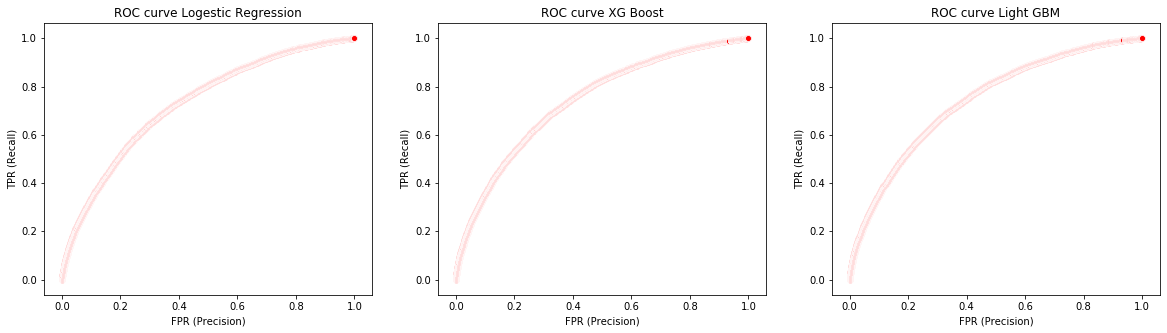

In [137]:
fpr1, tpr1, _ = roc_curve (y_test, y_prob1[:,1])
fpr2, tpr2, _ = roc_curve (y_test, y_prob2[:,1])
fpr3, tpr3, _ = roc_curve (y_test, y_prob3[:,1])


# title('XGBoost ROC curve'). # xlabel('FPR (Precision)'). # ylabel( 'TPR (Recall)')
fig,axes = plt.subplots(1,3,figsize = (20,5))
models = ["Logestic Regression","XG Boost","Light GBM"]
fpr = [fpr1,fpr2,fpr3]
tpr = [tpr1,tpr2,tpr3]

for i in range(3):
    plt.subplot(1,3,i+1)
    sns.scatterplot(fpr[i], tpr[i],color = 'r')
    plt.title("ROC curve {}".format(models[i]))
    plt.xlabel('FPR (Precision)')
    plt.ylabel('TPR (Recall)')
    print('Area under curve (AUC) of {}: {}'.format(models[i],auc(fpr[i], tpr[i])))
plt.show()
    
#print('Area under curve (AUC): ', auc(fpr, tpr))


In [149]:
print("LOGISTIC REGRESSION - STAGE 1")
print(metrics.classification_report(y_tests1,y_preds1))

print("LOGISTIC REGRESSION - STAGE 2")
print(metrics.classification_report(y_test,y_pred1))

print("XG BOOST")
print(metrics.classification_report(y_test,y_pred2))

print("LIGHT GBM")
print(metrics.classification_report(y_test,y_pred3))

LOGISTIC REGRESSION - STAGE 1
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2431
           1       0.00      0.00      0.00       150

    accuracy                           0.94      2581
   macro avg       0.47      0.50      0.49      2581
weighted avg       0.89      0.94      0.91      2581

LOGISTIC REGRESSION - STAGE 2
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     84880
           1       0.15      0.66      0.25      7373

    accuracy                           0.68     92253
   macro avg       0.56      0.67      0.52     92253
weighted avg       0.89      0.68      0.75     92253

XG BOOST
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84880
           1       0.16      0.65      0.26      7373

    accuracy                           0.70     92253
   macro avg       0.56      0.68      0.54     92253
weigh

.

### SLIDES - SCORECARD --------------------------------------------------------------------------------------------------------------------------------

.

# Scorecard Development: LGBM

In [138]:
y_prob = model3.predict_proba(X_test)
y_pred = model3.predict(X_test)

In [139]:
print(y_prob[:,0])

[0.62992086 0.78283875 0.24402498 ... 0.71638164 0.85412727 0.41087774]


In [140]:
X_test1 = X_test.copy()
X_test1['Default_prob'] = y_prob[:,0]

In [141]:
X_test1['predictions'] = y_pred

In [142]:
X_test1 = X_test1.reset_index()
X_test1.head()

,index,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_BIRTH,OCCUPATION_TYPE,DAYS_LAST_PHONE_CHANGE,NAME_INCOME_TYPE,CODE_GENDER,ORGANIZATION_TYPE,DAYS_ID_PUBLISH,...,NAME_HOUSING_TYPE,FLAG_PHONE,FLAG_WORK_PHONE,FLAG_OWN_CAR,REGION_POPULATION_RELATIVE,HOUR_APPR_PROCESS_START,Flag_Documents,DEF_30_CNT_SOCIAL_CIRCLE,Default_prob,predictions
0,129837,0.859924,0.605103,0.825074,0.298082,0.498835,0.184792,0.253784,0.016931,0.323235,...,-0.039515,0.0,0.0,0.055054,0.087776,7.0,3.0,0.0,0.629921,0
1,295081,0.535276,0.647992,0.832992,-0.257508,0.998835,0.184792,-0.156449,0.016931,0.779670,...,-0.039515,1.0,1.0,-0.114634,0.491595,18.0,3.0,0.0,0.782839,0
2,52785,0.245851,0.105210,0.107712,-0.225002,0.702237,-0.407830,-0.156449,-0.404203,0.131447,...,-0.039515,0.0,0.0,0.055054,0.142153,12.0,0.0,1.0,0.244025,1
3,179486,0.614414,0.542296,0.578093,0.180642,0.590168,0.184792,-0.156449,0.148624,1.000000,...,-0.039515,0.0,1.0,0.055054,0.344429,12.0,3.0,0.0,0.621541,0
4,219172,0.589864,0.748653,0.130554,-0.225002,0.826654,-0.407830,-0.156449,-0.404203,0.157737,...,-0.039515,0.0,0.0,0.055054,0.157398,12.0,3.0,0.0,0.748853,0


In [143]:
ser = []
ser_1 = []
for i in range(X_test1.shape[0]):
    if 0<X_test1['Default_prob'][i]<=0.5:
        ser.append(300 + X_test1['Default_prob'][i]*329/0.5)
        ser_1.append('BAD')
    elif 0.5<X_test1['Default_prob'][i]<=0.63:
        ser.append(630 + (X_test1['Default_prob'][i]-0.5)*59/0.13)
        ser_1.append('FAIR')
    elif 0.63<X_test1['Default_prob'][i]<=0.69:
        ser.append(690 + (X_test1['Default_prob'][i]-0.63)*29/0.06)
        ser_1.append('GOOD')
    elif 0.69<X_test1['Default_prob'][i]<=1:
        ser.append(720 + (X_test1['Default_prob'][i]-0.69)*130/0.31)
        ser_1.append('EXCELLENT')
        

In [144]:
X_test1['SCORE'] = ser
X_test1['RATING'] = ser_1

In [145]:
X_test1.loc[:,['predictions','Default_prob','SCORE','RATING']]

,predictions,Default_prob,SCORE,RATING
0,0,0.629921,688.964083,FAIR
1,0,0.782839,758.932378,EXCELLENT
2,1,0.244025,460.568436,BAD
3,0,0.621541,685.160927,FAIR
4,0,0.748853,744.680165,EXCELLENT
...,...,...,...,...
92248,1,0.353587,532.660202,BAD
92249,1,0.277970,482.904275,BAD
92250,0,0.716382,731.063267,EXCELLENT
92251,0,0.854127,788.827567,EXCELLENT


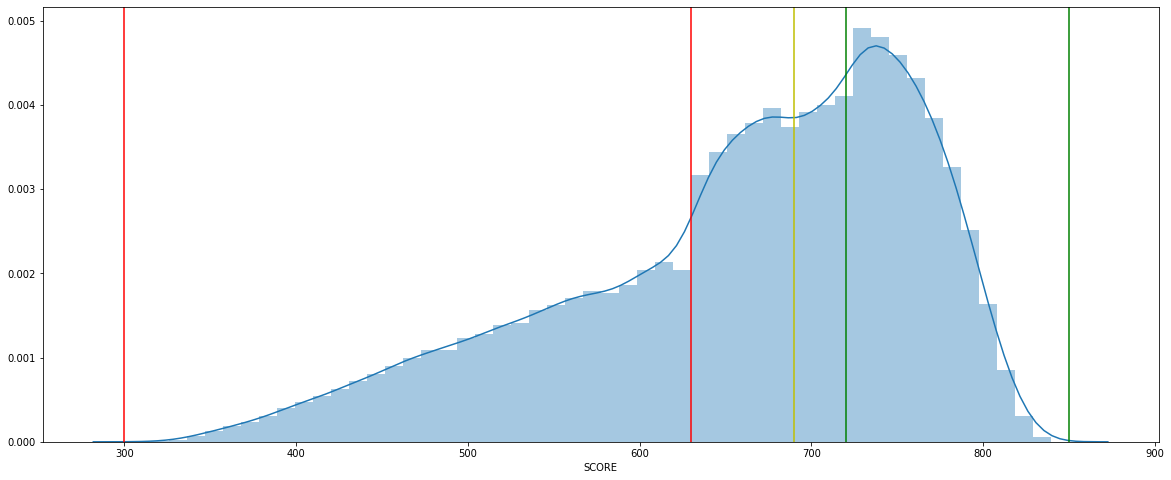

In [146]:
plt.figure(figsize = (20,8))
sns.distplot(X_test1['SCORE'])
plt.axvline(300,color = 'r')
plt.axvline(630,color = 'r')
plt.axvline(690,color = 'y')
plt.axvline(720,color = 'g')
plt.axvline(850,color = 'g')
plt.show()

.

### SLIDES - KAGGLE ----------------------------------------------------------------------------------------------------------------------------------------

.

###  <--------------------------------------------------------------------FINISH-------------------------------------------------------------------------->